# Loading and cleaning the data

In [1]:
import pandas as pd 
from sklearn.preprocessing import OneHotEncoder,RobustScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
missing_values = ["n/a", "na", "--", ' ', '?'] #list of possible missing values
# laoding the dataset
train_data = pd.read_csv("Training Data.csv",na_values = missing_values) 
test_data = pd.read_csv("Test data.csv", na_values = missing_values) 

In [3]:
# making copies of the dataframes so original files remain unaffected
train_df = train_data.copy() 
test_df = test_data.copy() 

In [4]:
train_df.shape

(100514, 19)

In [5]:
test_df.shape

(10353, 18)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10353 entries, 0 to 10352
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       10000 non-null  object 
 1   Customer ID                   10000 non-null  object 
 2   Current Loan Amount           10000 non-null  float64
 3   Term                          10000 non-null  object 
 4   Credit Score                  8019 non-null   float64
 5   Annual Income                 8019 non-null   float64
 6   Years in current job          9573 non-null   object 
 7   Home Ownership                10000 non-null  object 
 8   Purpose                       10000 non-null  object 
 9   Monthly Debt                  10000 non-null  float64
 10  Years of Credit History       10000 non-null  float64
 11  Months since last delinquent  4694 non-null   float64
 12  Number of Open Accounts       10000 non-null  float64
 13  N

In [8]:
train_df.nunique()

Loan ID                         81999
Customer ID                     81999
Loan Status                         2
Current Loan Amount             22004
Term                                2
Credit Score                      324
Annual Income                   36174
Years in current job               11
Home Ownership                      4
Purpose                            16
Monthly Debt                    65765
Years of Credit History           506
Months since last delinquent      116
Number of Open Accounts            51
Number of Credit Problems          14
Current Credit Balance          32730
Maximum Open Credit             44596
Bankruptcies                        8
Tax Liens                          12
dtype: int64

In [9]:
test_df.nunique()

Loan ID                         10000
Customer ID                     10000
Current Loan Amount              6786
Term                                2
Credit Score                      272
Annual Income                    7200
Years in current job               11
Home Ownership                      4
Purpose                            16
Monthly Debt                     9729
Years of Credit History           424
Months since last delinquent       89
Number of Open Accounts            45
Number of Credit Problems           9
Current Credit Balance           8430
Maximum Open Credit              9064
Bankruptcies                        5
Tax Liens                           8
dtype: int64

In [10]:
# dropping the ID columns as these are just identifiers for specific rows
train_df.drop(columns=["Loan ID", "Customer ID"], inplace=True) 
test_df.drop(columns=["Loan ID", "Customer ID"], inplace=True) 

In [11]:
#checking for duplicated rows
num_duplicated_rows = train_df.duplicated().sum()
print(f"Number of duplicated rows: {num_duplicated_rows}")

num_duplicated_rows2 = test_df.duplicated().sum()
print(f"Number of duplicated rows: {num_duplicated_rows2}")

Number of duplicated rows: 10728
Number of duplicated rows: 352


In [12]:
#dropping duplicated rows
train_df = train_df.drop_duplicates()
test_df = test_df.drop_duplicates()

In [13]:
train_missing_value_percent = (train_df.isnull().sum()/len(train_df))*100
train_missing_value_percent

Loan Status                      0.001114
Current Loan Amount              0.001114
Term                             0.001114
Credit Score                    21.334061
Annual Income                   21.334061
Years in current job             4.235627
Home Ownership                   0.001114
Purpose                          0.001114
Monthly Debt                     0.001114
Years of Credit History          0.001114
Months since last delinquent    53.836901
Number of Open Accounts          0.001114
Number of Credit Problems        0.001114
Current Credit Balance           0.001114
Maximum Open Credit              0.003341
Bankruptcies                     0.212728
Tax Liens                        0.011138
dtype: float64

In [14]:
test_missing_value_percent = (test_df.isnull().sum()/len(test_df))*100
test_missing_value_percent

Current Loan Amount              0.009999
Term                             0.009999
Credit Score                    19.818018
Annual Income                   19.818018
Years in current job             4.279572
Home Ownership                   0.009999
Purpose                          0.009999
Monthly Debt                     0.009999
Years of Credit History          0.009999
Months since last delinquent    53.064694
Number of Open Accounts          0.009999
Number of Credit Problems        0.009999
Current Credit Balance           0.009999
Maximum Open Credit              0.009999
Bankruptcies                     0.229977
Tax Liens                        0.019998
dtype: float64

In [15]:
#dealing with missing values where missingness represents information

#creating missingness indicator column
train_df['Credit_Score_missing'] = train_df['Credit Score'].isnull().astype(int)
train_df['Annual_Income_missing'] = train_df['Annual Income'].isnull().astype(int)
train_df['Years_in_current_job_missing'] = train_df['Years in current job'].isnull().astype(int)
train_df['Months_since_last_delinquent_missing'] = train_df['Months since last delinquent'].isnull().astype(int)

test_df['Credit_Score_missing'] = test_df['Credit Score'].isnull().astype(int)
test_df['Annual_Income_missing'] = test_df['Annual Income'].isnull().astype(int)
test_df['Years_in_current_job_missing'] = test_df['Years in current job'].isnull().astype(int)
test_df['Months_since_last_delinquent_missing'] = test_df['Months since last delinquent'].isnull().astype(int)

#filling missing values with a placeholder
train_df['Credit Score'].fillna(-1,inplace=True)
train_df['Annual Income'].fillna(-1,inplace=True)
train_df['Years in current job'].fillna("Missing",inplace=True)
train_df['Months since last delinquent'].fillna(-1,inplace=True)

test_df['Credit Score'].fillna(-1,inplace=True)
test_df['Annual Income'].fillna(-1,inplace=True)
test_df['Years in current job'].fillna("Missing",inplace=True)
test_df['Months since last delinquent'].fillna(-1,inplace=True)

In [16]:
# separating the data into categorical and numerical sets for preprocessing
num_col = train_df[[
    'Current Loan Amount',
    'Monthly Debt',
    'Years of Credit History',
    'Number of Open Accounts',
    'Number of Credit Problems',
    'Current Credit Balance',
    'Maximum Open Credit',
    'Bankruptcies',
    'Tax Liens'
]] 
cat_col = train_df[[
    'Term',         
    'Home Ownership',
    'Purpose'       
]] 

In [17]:
# filling missing numerical values with median (mean is affected by outliers)
for col in num_col: 
    train_df[col].fillna(train_df[col].median(), inplace=True) 
    if col in test_df.columns: 
        test_df[col].fillna(train_df[col].median(), inplace=True) 

In [18]:
#filling missing categorical values with mode
for col in cat_col:
    if col in train_df.columns: 
        train_df[col].fillna(train_df[col].mode()[0], inplace=True) 
    if col in test_df.columns: 
        test_df[col].fillna(train_df[col].mode()[0], inplace=True) 

In [19]:
#dropping missing values in the target column as imputation may introduce artificial bias
train_df.dropna(subset=['Loan Status'], inplace=True)

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.preprocessing import LabelEncoder

In [21]:
#building the preprocessing pipeline using column transformer
numeric_features = [
    'Current Loan Amount',
    'Monthly Debt',
    'Years of Credit History',
    'Number of Open Accounts',
    'Number of Credit Problems',
    'Current Credit Balance',
    'Maximum Open Credit',
    'Bankruptcies',
    'Tax Liens',
    'Credit Score',
    'Annual Income',
    'Months since last delinquent',
    'Credit_Score_missing',             
    'Annual_Income_missing',            
    'Years_in_current_job_missing',     
    'Months_since_last_delinquent_missing' 
]
numeric_transformer = Pipeline(
    steps=[
        ("scaler", RobustScaler())
    ])

categorical_features = [
    'Term',
    'Years in current job',
    'Home Ownership',
    'Purpose'
]
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
    ])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ],
)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = train_df.drop('Loan Status', axis=1)
y = train_df['Loan Status']

In [24]:
X_train, X_val, y_train, y_val =  train_test_split(X,y, random_state=42,
                                                   test_size=0.2, shuffle=True, stratify=y)

In [25]:
le = LabelEncoder()
le.fit(y_train)
y_train_encoded = le.fit_transform(y_train)
y_val_encoded = le.transform(y_val)

X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)
Test_processed = preprocessor.transform(test_df)

# Visualisations

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

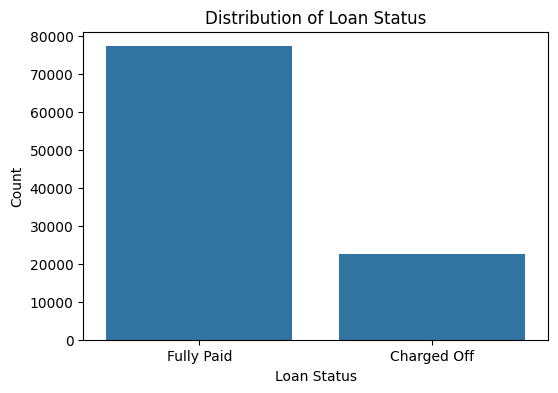

In [27]:
#class balance between "fully paid" and "charged off"
plt.figure(figsize=(6,4))
sns.countplot(x='Loan Status', data=train_data)
plt.title("Distribution of Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

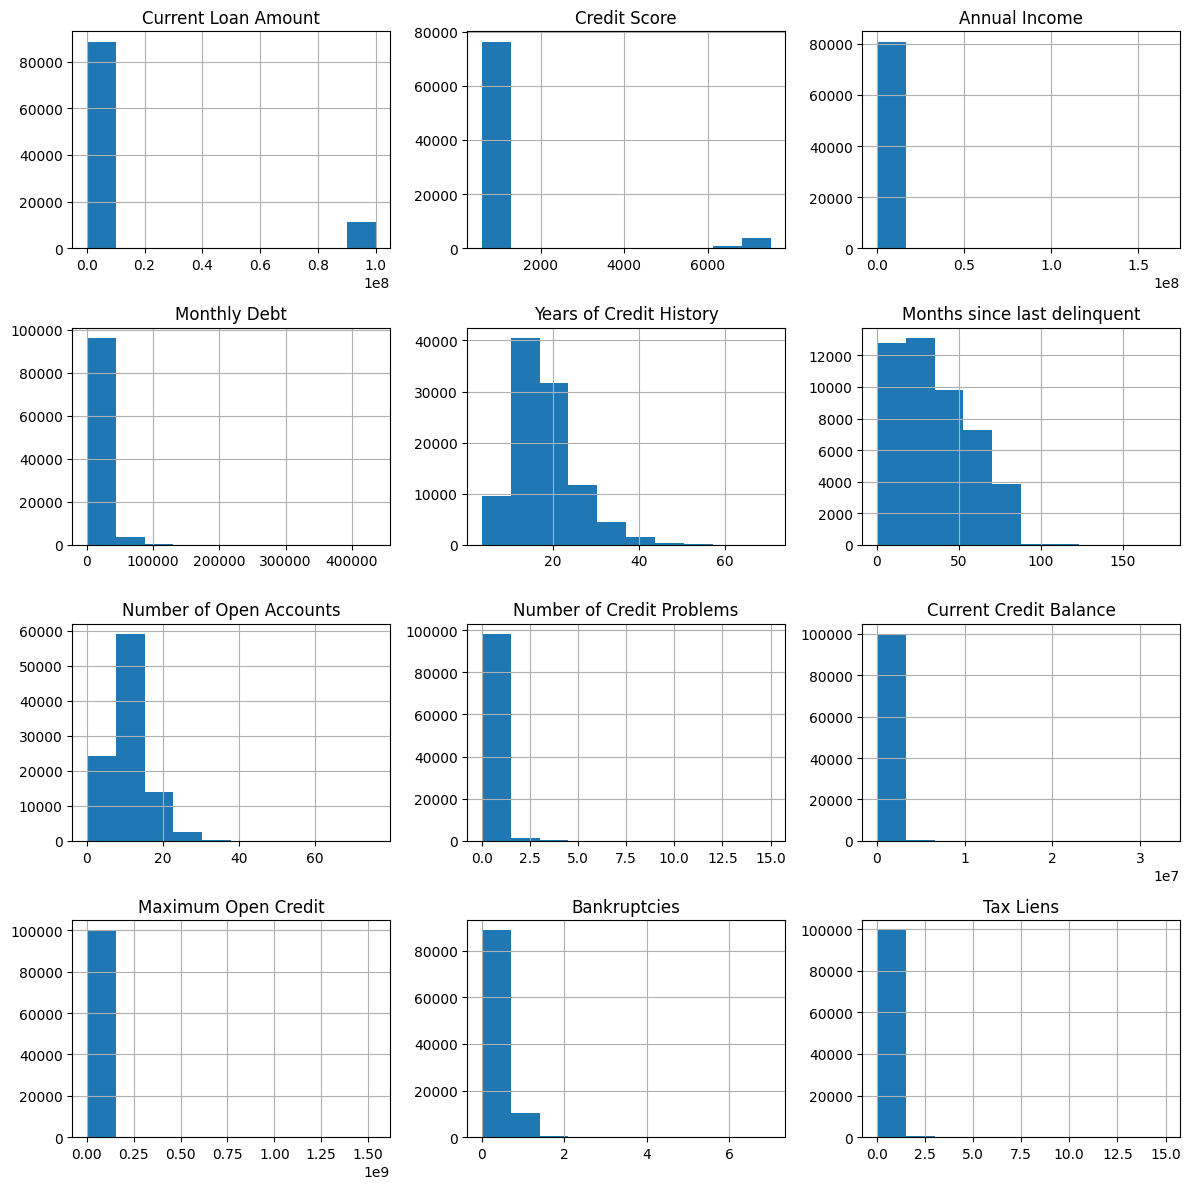

In [28]:
train_data.hist(figsize=(12,12))
plt.tight_layout()

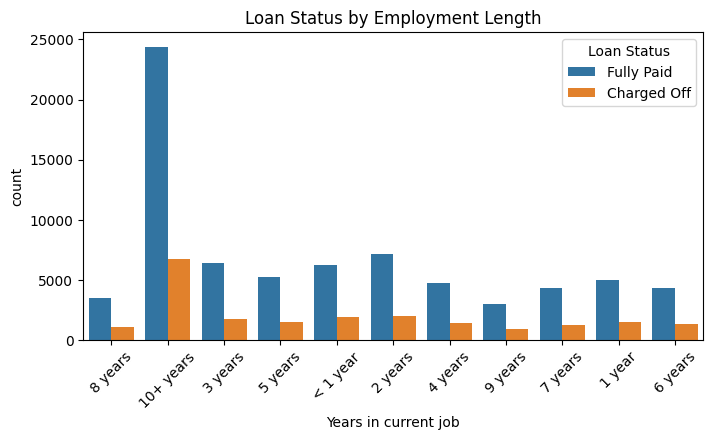

In [29]:
#showing the loan status by years
plt.figure(figsize=(8,4))
sns.countplot(x='Years in current job', hue='Loan Status', data=train_data)
plt.title("Loan Status by Employment Length")
plt.xticks(rotation=45)
plt.show()

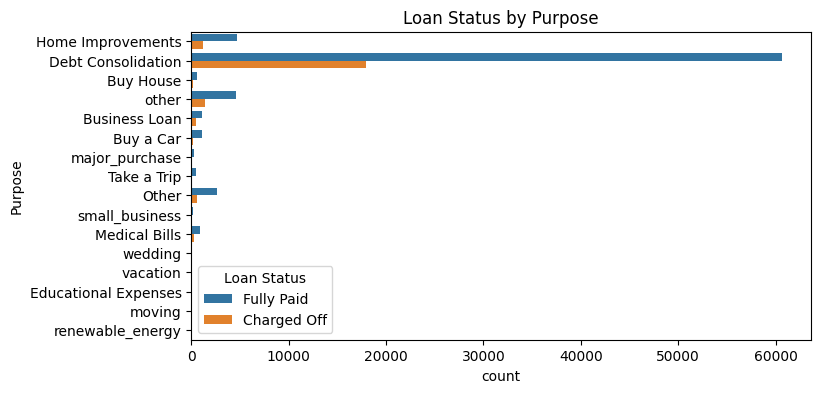

In [30]:
#how successful loans are repayed by Purpose 
plt.figure(figsize=(8,4))
sns.countplot(y='Purpose', hue='Loan Status', data=train_data)
plt.title("Loan Status by Purpose")
plt.show()

# Model building

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [32]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(sampling_strategy='minority')
X_train_Syn, y_train_Syn = adasyn.fit_resample(X_train_processed, y_train_encoded)
print(pd.Series(y_train_Syn).value_counts())

1    53717
0    53371
Name: count, dtype: int64


## Logistic Regression

In [33]:
LR_model = LogisticRegression()

#Same parameter grid but class weight removed to gauge the effect of ADASYn
param_grid_LR = [
    {'penalty':['l1', 'l2', 'elasticnet',' none'],
    'C': np.logspace(-4,4,20),
    'solver': ['saga'],
    'max_iter'  : [100,1000,2500,5000]}]

tuner_LR = RandomizedSearchCV(LR_model, param_distributions= param_grid_LR,
                              cv=3, verbose=1,n_jobs=-1 )

best_tuner_LR = tuner_LR.fit(X_train_Syn, y_train_Syn)
best_tuner_LR.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


,penalty,'l2'
,dual,False
,tol,0.0001
,C,np.float64(3792.690190732246)
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'saga'
,max_iter,1000
,multi_class,'deprecated'


In [34]:
LR_pred = best_tuner_LR.predict(X_val_processed)
print(classification_report(y_val_encoded, LR_pred))

              precision    recall  f1-score   support

           0       0.36      0.78      0.49      4528
           1       0.88      0.53      0.66     13429

    accuracy                           0.59     17957
   macro avg       0.62      0.66      0.58     17957
weighted avg       0.75      0.59      0.62     17957



In [35]:
# predicting using test data set and adding this as a column to the test dataset
test_predictionsDF = test_df.copy()
test_pred_LR =  best_tuner_LR.predict(Test_processed)
test_predictionsDF['Logistic Regression'] = test_pred_LR
test_predictionsDF.head()

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,...,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Credit_Score_missing,Annual_Income_missing,Years_in_current_job_missing,Months_since_last_delinquent_missing,Logistic Regression
0,611314.0,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,-1.0,...,0.0,621908.0,1058970.0,0.0,0.0,0,0,0,1,1
1,266662.0,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,-1.0,...,0.0,679573.0,904442.0,0.0,0.0,0,0,0,1,1
2,153494.0,Short Term,709.0,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10.0,...,0.0,38532.0,388036.0,0.0,0.0,0,0,0,0,0
3,176242.0,Short Term,727.0,780083.0,10+ years,Rent,Debt Consolidation,16771.87,16.5,27.0,...,1.0,156940.0,531322.0,1.0,0.0,0,0,0,0,0
4,321992.0,Short Term,744.0,1761148.0,10+ years,Home Mortgage,Debt Consolidation,39478.77,26.0,44.0,...,0.0,359765.0,468072.0,0.0,0.0,0,0,0,0,1


## Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
RF_model = RandomForestClassifier()

param_grid_RF = [{
    'n_estimators': [100, 200,300],
    'max_depth': [None, 10, 20,30],
    'max_features': ["sqrt", "log2", None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]}]

tuner_RF = RandomizedSearchCV(RF_model, param_distributions= param_grid_RF,
                              cv=3, verbose=1,n_jobs=-1 )

best_tuner_RF = tuner_RF.fit(X_train_Syn, y_train_Syn)
best_tuner_RF.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [38]:
RF_pred = best_tuner_RF.predict(X_val_processed)
print(classification_report(y_val_encoded, RF_pred))

              precision    recall  f1-score   support

           0       0.52      0.43      0.47      4528
           1       0.82      0.87      0.84     13429

    accuracy                           0.76     17957
   macro avg       0.67      0.65      0.66     17957
weighted avg       0.74      0.76      0.75     17957



In [39]:
test_pred_RF =  best_tuner_RF.predict(Test_processed)
test_predictionsDF['Random Forest'] = test_pred_RF

## XGBOOST

In [40]:
import xgboost as xgb

In [41]:
XGB_model = xgb.XGBClassifier()

param_grid_XGB = [{
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1]}]

# only consider linear kernel as considering both rbf and linear was taking too long
tuner_XGB = RandomizedSearchCV(XGB_model, param_distributions= param_grid_XGB,
                              cv=3, verbose=1,n_jobs=-1 )

best_tuner_XGB= tuner_XGB.fit(X_train_Syn, y_train_Syn)
best_tuner_XGB.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [42]:
XGB_pred = best_tuner_XGB.predict(X_val_processed)
print(classification_report(y_val_encoded, XGB_pred))

              precision    recall  f1-score   support

           0       0.50      0.46      0.48      4528
           1       0.82      0.85      0.83     13429

    accuracy                           0.75     17957
   macro avg       0.66      0.65      0.66     17957
weighted avg       0.74      0.75      0.74     17957



In [43]:
test_pred_XGB =  best_tuner_XGB.predict(Test_processed)
test_predictionsDF['XGBOOST'] = test_pred_XGB

## Neural Network

In [44]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras_tuner import RandomSearch

In [45]:
# Model-building function
def build_model(hp):
    model = Sequential()
    # Tune the number of layers
    for i in range(hp.Int('num_layers', min_value=1, max_value=3)):#relates to number of layers
        model.add(Dense(units=hp.Int('units_' + str(i), #relates to number of neurons in each layer
                                     min_value=32,
                                     max_value=128,
                                     step=32), #possible values are 32, 64, 96 and 128
                        activation='relu'))
    
    model.add(Dense(1, activation='sigmoid')) #activation for output layer
    model.compile(optimizer=hp.Choice('optimizer', values=['sgd']), # stochastic gradient descent
                  loss='binary_crossentropy',
                  metrics=['auc'])
    return model

In [46]:
from kerastuner.tuners import RandomSearch

In [47]:
# Initializing Random Search
tuner = RandomSearch(
    build_model,
    objective='val_auc',
    max_trials=5,  # number of combinations to try
    executions_per_trial=1,
    directory='hyperparam_tuning',
    project_name='AdultIncome_model'
)

Reloading Tuner from hyperparam_tuning\AdultIncome_model\tuner0.json


In [48]:
# Performing hyperparameter tuning
tuner.search(X_train_Syn, y_train_Syn, epochs=10,validation_split=0.2,verbose=0)

#Fetching the best hyperparameters
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]


# Building the model with the best hyperparameters
model = tuner.hypermodel.build(best_hp)
# Training the final model
model.fit(X_train_Syn, y_train_Syn, epochs=50,verbose=0)

In [49]:
NN_prob = model.predict(X_val_processed)

#since sigmoid gives outputs as probabilities, need to convert this to class labels
NN_pred = np.where(NN_prob > 0.5, 1, 0)

print(classification_report(y_val_encoded, NN_pred))

562/562 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.38      0.70      0.49      4528
           1       0.86      0.61      0.71     13429

    accuracy                           0.63     17957
   macro avg       0.62      0.65      0.60     17957
weighted avg       0.74      0.63      0.66     17957



In [50]:
test_pred_NN =  model.predict(Test_processed)
test_predictionsDF['Neural Network'] = test_pred_NN

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


### Ensemble model of XGBOOST, Logistic Regression and Random Forest

In [51]:
from sklearn.ensemble import VotingClassifier

In [52]:
models = [
    ("LR", best_tuner_LR),
    ("RF", best_tuner_RF),
    ("XGB", best_tuner_XGB)
]

In [53]:
vot_soft = VotingClassifier(estimators=models, voting='soft',n_jobs=-1)
vot_soft.fit(X_train_Syn, y_train_Syn)

,estimators,"[('LR', ...), ('RF', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,-1
,flatten_transform,True
,verbose,False
,penalty,'l2'
,dual,False
,tol,0.0001
,C,np.float64(3792.690190732246)
,fit_intercept,True


In [54]:
Combined_pred = vot_soft.predict(X_val_processed)
print(classification_report(y_val_encoded, Combined_pred))

              precision    recall  f1-score   support

           0       0.51      0.49      0.50      4528
           1       0.83      0.84      0.83     13429

    accuracy                           0.75     17957
   macro avg       0.67      0.66      0.67     17957
weighted avg       0.75      0.75      0.75     17957



In [55]:
test_pred_VC =  vot_soft.predict(Test_processed)
test_predictionsDF['Voting Classifier'] = test_pred_VC

# Model Evaluation

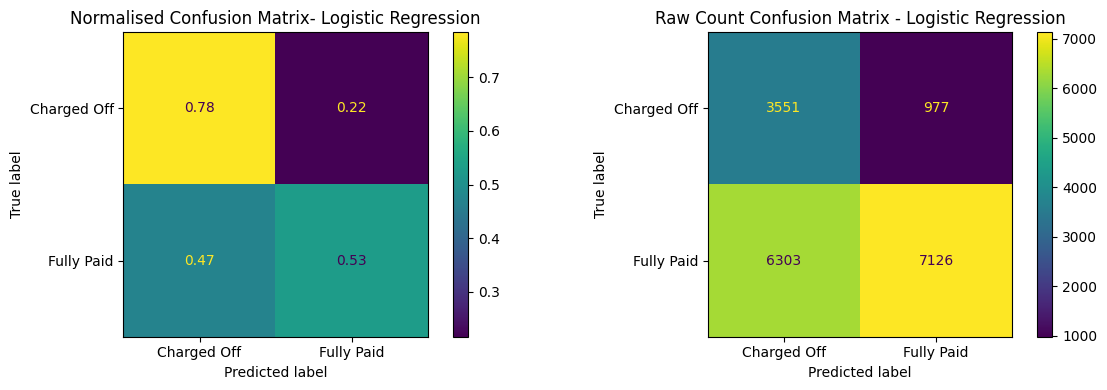

In [56]:
# logistic regression 
# confusion matrix 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt 

fig, axes = plt.subplots(1, 2, figsize = (12,4))

#normalised confusion matrix 
logistic_cm_normalised = confusion_matrix(y_val_encoded, LR_pred, normalize = 'true') 
logistic_cm_display_normalised = ConfusionMatrixDisplay(confusion_matrix=logistic_cm_normalised , display_labels = ['Charged Off', 'Fully Paid'])
logistic_cm_display_normalised.plot(ax=axes[0], values_format='.2f')
axes[0].set_title('Normalised Confusion Matrix- Logistic Regression')

# raw count confusion matrix 
logistic_cm = confusion_matrix(y_val_encoded, LR_pred)
logistic_cm_display = ConfusionMatrixDisplay(confusion_matrix=logistic_cm, display_labels = ['Charged Off', 'Fully Paid'])
logistic_cm_display.plot(ax=axes[1])
axes[1].set_title('Raw Count Confusion Matrix - Logistic Regression')

plt.tight_layout()
plt.show()

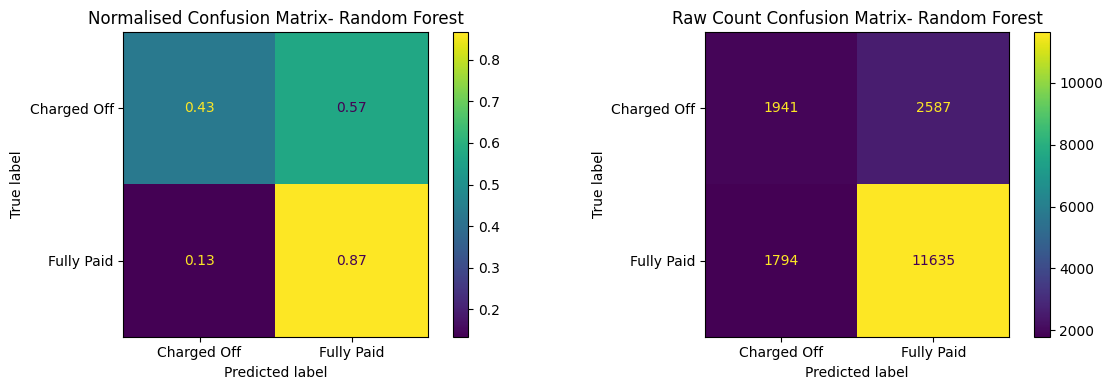

In [57]:
# random forest 
# confusion matrix 
fig, axes = plt.subplots(1, 2, figsize = (12,4))

#normalised confusion matrix
forest_cm_normalised = confusion_matrix(y_val_encoded, RF_pred, normalize = 'true') 
forest_cm_display_normalised = ConfusionMatrixDisplay(confusion_matrix=forest_cm_normalised , display_labels = ['Charged Off', 'Fully Paid'])
forest_cm_display_normalised.plot(ax=axes[0], values_format='.2f')
axes[0].set_title('Normalised Confusion Matrix- Random Forest')

# raw count confusion matrix 
forest_cm = confusion_matrix(y_val_encoded, RF_pred)
forest_cm_display = ConfusionMatrixDisplay(confusion_matrix=forest_cm , display_labels = ['Charged Off', 'Fully Paid'])
forest_cm_display.plot(ax=axes[1])
axes[1].set_title('Raw Count Confusion Matrix- Random Forest')

plt.tight_layout()
plt.show()

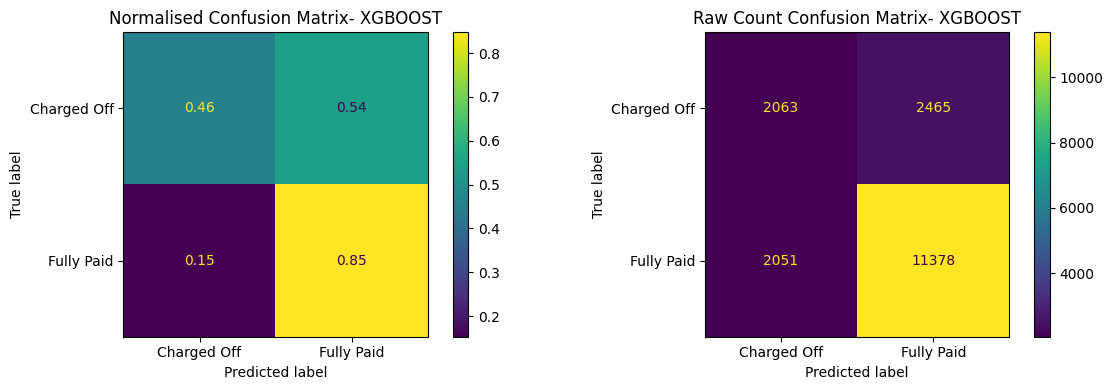

In [58]:
# XGBOOST
# confusion matrix 
fig, axes = plt.subplots(1, 2, figsize = (12,4))

#normalised confusion matrix
xgboost_cm_normalised = confusion_matrix(y_val_encoded, XGB_pred, normalize = 'true') 
xgboost_cm_display_normalised = ConfusionMatrixDisplay(confusion_matrix=xgboost_cm_normalised , display_labels = ['Charged Off', 'Fully Paid'])
xgboost_cm_display_normalised.plot(ax=axes[0], values_format='.2f')
axes[0].set_title('Normalised Confusion Matrix- XGBOOST')

#raw count confusion matrix 
xgboost_cm = confusion_matrix(y_val_encoded, XGB_pred)
xgboost_cm_display = ConfusionMatrixDisplay(confusion_matrix=xgboost_cm , display_labels = ['Charged Off', 'Fully Paid'])
xgboost_cm_display.plot(ax=axes[1])
axes[1].set_title('Raw Count Confusion Matrix- XGBOOST')

plt.tight_layout()
plt.show()

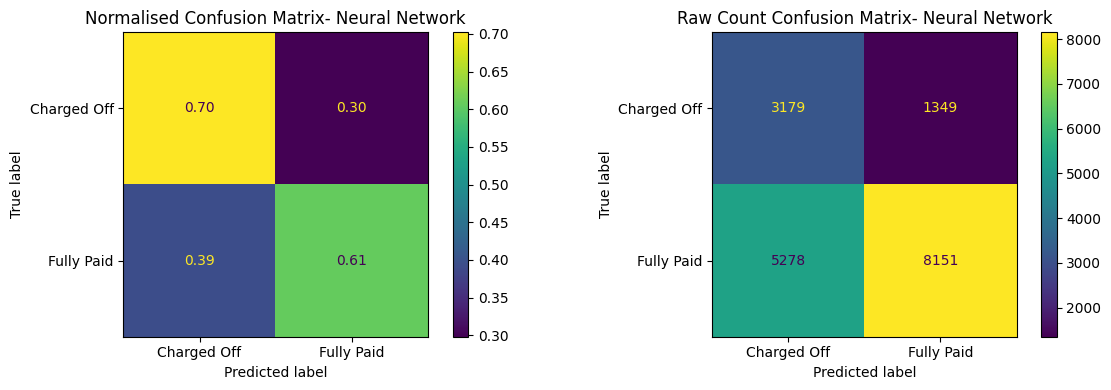

In [59]:
# Neural network
# confusion matrix 
fig, axes = plt.subplots(1, 2, figsize = (12,4))

#normalised confusion matrix
NN_cm_normalised = confusion_matrix(y_val_encoded, NN_pred, normalize = 'true') 
NN_cm_display_normalised = ConfusionMatrixDisplay(confusion_matrix=NN_cm_normalised , display_labels = ['Charged Off', 'Fully Paid'])
NN_cm_display_normalised.plot(ax=axes[0], values_format='.2f')
axes[0].set_title('Normalised Confusion Matrix- Neural Network')

#raw count confusion matrix 
NN_cm = confusion_matrix(y_val_encoded, NN_pred)
NN_cm_display = ConfusionMatrixDisplay(confusion_matrix=NN_cm , display_labels = ['Charged Off', 'Fully Paid'])
NN_cm_display.plot(ax=axes[1])
axes[1].set_title('Raw Count Confusion Matrix- Neural Network')

plt.tight_layout()
plt.show()

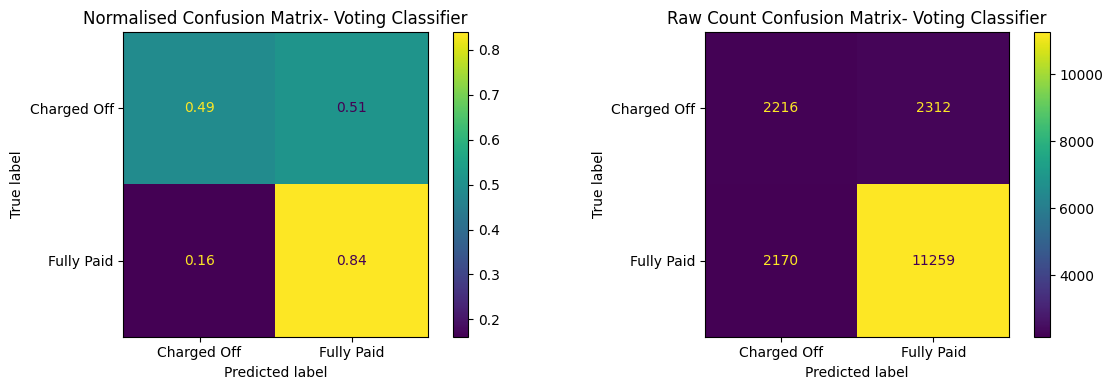

In [60]:
# Voting classifier
# confusion matrix 
fig, axes = plt.subplots(1, 2, figsize = (12,4))

#normalised confusion matrix
VC_cm_normalised = confusion_matrix(y_val_encoded, Combined_pred, normalize = 'true') 
VC_cm_display_normalised = ConfusionMatrixDisplay(confusion_matrix=VC_cm_normalised , display_labels = ['Charged Off', 'Fully Paid'])
VC_cm_display_normalised.plot(ax=axes[0], values_format='.2f')
axes[0].set_title('Normalised Confusion Matrix- Voting Classifier')

#raw count confusion matrix 
VC_cm = confusion_matrix(y_val_encoded, Combined_pred)
VC_cm_display = ConfusionMatrixDisplay(confusion_matrix=VC_cm , display_labels = ['Charged Off', 'Fully Paid'])
VC_cm_display.plot(ax=axes[1])
axes[1].set_title('Raw Count Confusion Matrix- Voting Classifier')

plt.tight_layout()
plt.show()

562/562 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


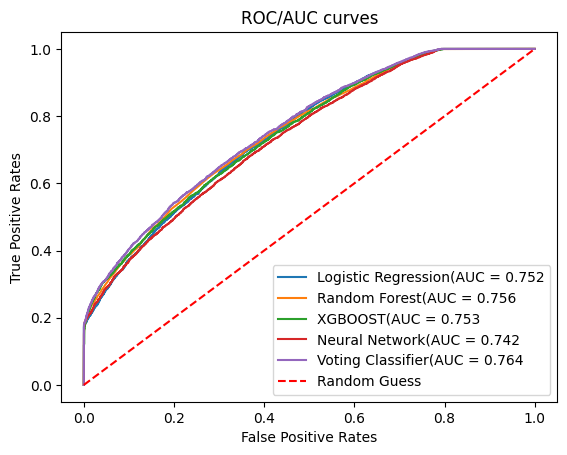

In [61]:
#AUC-ROC 
from sklearn.metrics import roc_curve, roc_auc_score
y_prob_LR = best_tuner_LR.predict_proba(X_val_processed)[:, 1] # probability that each loan is fully paid (1)
y_prob_RF = best_tuner_RF.predict_proba(X_val_processed)[:, 1]
y_prob_XGB = best_tuner_XGB.predict_proba(X_val_processed)[:, 1]
y_prob_NN = model.predict(X_val_processed)
y_prob_VC = vot_soft.predict_proba(X_val_processed)[:, 1]

fpr_LR, tpr_LR, _ = roc_curve(y_val_encoded, y_prob_LR) #calculates false- and true positive rates at different thresholds, this is specificity and sensitivity respectively
fpr_RF, tpr_RF, _ = roc_curve(y_val_encoded, y_prob_RF)
fpr_XGB, tpr_XGB, _ = roc_curve(y_val_encoded, y_prob_XGB)
fpr_NN, tpr_NN, _ = roc_curve(y_val_encoded, y_prob_NN)
fpr_VC, tpr_VC, _ = roc_curve(y_val_encoded, y_prob_VC)

auc_LR = roc_auc_score(y_val_encoded, y_prob_LR) #roc_auc_score computes the auc score without having to manually put in points 
auc_RF = roc_auc_score(y_val_encoded, y_prob_RF)
auc_XGB = roc_auc_score(y_val_encoded, y_prob_XGB)
auc_NN = roc_auc_score(y_val_encoded, y_prob_NN)
auc_VC = roc_auc_score(y_val_encoded, y_prob_VC)

#plotting the curve 
plt.plot(fpr_LR, tpr_LR, label= f'Logistic Regression(AUC = {auc_LR:.3f}')
plt.plot(fpr_RF, tpr_RF, label= f'Random Forest(AUC = {auc_RF:.3f}')
plt.plot(fpr_XGB, tpr_XGB, label= f'XGBOOST(AUC = {auc_XGB:.3f}')
plt.plot(fpr_NN, tpr_NN, label= f'Neural Network(AUC = {auc_NN:.3f}')
plt.plot(fpr_VC, tpr_VC, label= f'Voting Classifier(AUC = {auc_VC:.3f}')

plt.plot([0, 1], [0, 1], 'r--', label = 'Random Guess') #baseline to show random guessing/classifying 

plt.xlabel('False Positive Rates')
plt.ylabel('True Positive Rates')
plt.title('ROC/AUC curves')
plt.legend()
plt.show()  

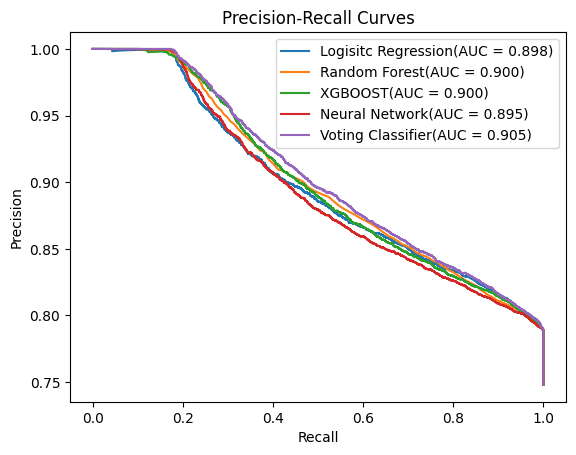

In [62]:
# Precision-recall curve 
# used when one class is more dominant than the other
# x-axis = recall y-axis = precision 
# only looks at the positive class which in this case is 1= fully paid 
from sklearn.metrics import precision_recall_curve, average_precision_score 
prec_LR, recall_LR, thresholds = precision_recall_curve(y_val_encoded, y_prob_LR)
prec_RF, recall_RF, thresholds = precision_recall_curve(y_val_encoded, y_prob_RF)
prec_XGB, recall_XGB, thresholds = precision_recall_curve(y_val_encoded, y_prob_XGB)
prec_NN, recall_NN, thresholds = precision_recall_curve(y_val_encoded, y_prob_NN)
prec_VC, recall_VC, thresholds = precision_recall_curve(y_val_encoded, y_prob_VC)

# similar methodolgy to area-under-curve this time for precision-recall curve-> area under precision-recall curve 
avp_LR = average_precision_score(y_val_encoded,y_prob_LR) 
avp_RF = average_precision_score(y_val_encoded,y_prob_RF) 
avp_XGB = average_precision_score(y_val_encoded,y_prob_XGB) 
avp_NN = average_precision_score(y_val_encoded,y_prob_NN)
avp_VC = average_precision_score(y_val_encoded,y_prob_VC)

#plot 
plt.plot(recall_LR, prec_LR, label= f'Logisitc Regression(AUC = {avp_LR:.3f})')
plt.plot(recall_RF, prec_RF, label= f'Random Forest(AUC = {avp_RF:.3f})')
plt.plot(recall_XGB, prec_XGB, label= f'XGBOOST(AUC = {avp_XGB:.3f})')
plt.plot(recall_NN, prec_NN, label= f'Neural Network(AUC = {avp_NN:.3f})')
plt.plot(recall_VC, prec_VC, label= f'Voting Classifier(AUC = {avp_VC:.3f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend()
plt.show()

In [63]:
#%pip install statsmodels

In [64]:
# stats test
from statsmodels.stats.contingency_tables import mcnemar

# comparing LR vs RF
print("Logistic Regression comparisons")
crosstab_lr_rf = pd.crosstab(test_predictionsDF['Logistic Regression'], test_predictionsDF['Random Forest'], margins = False)
mcnemar_lr_rf = mcnemar(crosstab_lr_rf, exact = False)
print('McNemar Test for LR vs RF:', mcnemar_lr_rf)

# comparing LR vs XGBOOST
crosstab_lr_xgb = pd.crosstab(test_predictionsDF['Logistic Regression'], test_predictionsDF['XGBOOST'], margins = False)
mcnemar_lr_xgb = mcnemar(crosstab_lr_xgb, exact = False)
print('McNemar Test for LR vs XGBOOST:', mcnemar_lr_xgb)

# comparing LR vs Neural Network 
crosstab_lr_nn = pd.crosstab(test_predictionsDF['Logistic Regression'], test_predictionsDF['Neural Network'], margins = False)
mcnemar_lr_nn = mcnemar(crosstab_lr_nn, exact = False)
print('McNemar Test for LR vs Neural Network:', mcnemar_lr_nn)

# comparing LR vs Voting Classifier 
crosstab_lr_vc = pd.crosstab(test_predictionsDF['Logistic Regression'], test_predictionsDF['Voting Classifier'], margins = False)
mcnemar_lr_vc = mcnemar(crosstab_lr_vc, exact = False)
print('McNemar Test for LR vs Voting Classifier:', mcnemar_lr_vc)

print("\nRandom Forest comparisons")
# comparing RF vs XGBOOST
crosstab_rf_xgb = pd.crosstab(test_predictionsDF['Random Forest'], test_predictionsDF['XGBOOST'], margins = False)
mcnemar_rf_xgb = mcnemar(crosstab_rf_xgb, exact = False)
print('McNemar Test for RF vs XGBOOST:', mcnemar_rf_xgb)

# comparing RF vs Neural Network 
crosstab_rf_nn = pd.crosstab(test_predictionsDF['Random Forest'], test_predictionsDF['Neural Network'], margins = False)
mcnemar_rf_nn = mcnemar(crosstab_rf_nn, exact = False)
print('McNemar Test for RF vs Neural Network:', mcnemar_rf_nn)

# comparing RF vs Voting Classifier
crosstab_rf_vc = pd.crosstab(test_predictionsDF['Random Forest'], test_predictionsDF['Voting Classifier'], margins = False)
mcnemar_rf_vc = mcnemar(crosstab_rf_vc, exact = False)
print('McNemar Test for RF vs Voting Classifier:', mcnemar_rf_vc)

print("\nXGBOOST comparisons")
# comparing XGBOOST vs Neural Network 
crosstab_xgb_nn = pd.crosstab(test_predictionsDF['XGBOOST'], test_predictionsDF['Neural Network'], margins = False)
mcnemar_xgb_nn = mcnemar(crosstab_xgb_nn, exact = False)
print('McNemar Test for XGBOOST vs Neural Network:', mcnemar_xgb_nn)

# comparing XGBOOST vs Voting Classifier
crosstab_xgb_vc = pd.crosstab(test_predictionsDF['XGBOOST'], test_predictionsDF['Voting Classifier'], margins = False)
mcnemar_xgb_vc = mcnemar(crosstab_xgb_vc, exact = False)
print('McNemar Test for XGBOOST vs Voting Classifier:', mcnemar_xgb_vc)

print("\nNeural network comparison")
# comparing Neural Network vs Voting Classifier
crosstab_nn_vc = pd.crosstab(test_predictionsDF['Neural Network'], test_predictionsDF['Voting Classifier'], margins = False)
mcnemar_nn_vc = mcnemar(crosstab_nn_vc, exact = False)
print('McNemar Test for Neural Network vs Voting Classifier:', mcnemar_nn_vc)

Logistic Regression comparisons
McNemar Test for LR vs RF: pvalue      0.0
statistic   3707.238376383764
McNemar Test for LR vs XGBOOST: pvalue      0.0
statistic   3299.3802816901407
McNemar Test for LR vs Neural Network: pvalue      1.0
statistic   0.0
McNemar Test for LR vs Voting Classifier: pvalue      0.0
statistic   3529.954483136825

Random Forest comparisons
McNemar Test for RF vs XGBOOST: pvalue      5.926903804871504e-39
statistic   170.44109396914445
McNemar Test for RF vs Neural Network: pvalue      1.0
statistic   0.0
McNemar Test for RF vs Voting Classifier: pvalue      1.9924351577874587e-28
statistic   122.29202279202279

XGBOOST comparisons
McNemar Test for XGBOOST vs Neural Network: pvalue      1.0
statistic   0.0
McNemar Test for XGBOOST vs Voting Classifier: pvalue      1.1340465078752993e-09
statistic   37.079588014981276

Neural network comparison
McNemar Test for Neural Network vs Voting Classifier: pvalue      1.0
statistic   0.0
